In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  
    ('order_items.csv','order_items') # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ankit24@7',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/dell/OneDrive/Desktop/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

ModuleNotFoundError: No module named 'mysql'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Ankit24@7",
                            database = "ecommerce")

cur = db.cursor()

# Basic
# 1. List all unique cities where customers are located.

In [2]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [3]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are",data[0][0]

('Total orders placed in 2017 are', 270606)

# 3. Find the total sales per category.

In [3]:
query = """select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category" , "Sales"])
df

NameError: name 'cur' is not defined

# 4. Calculate the percentage of orders that were paid in installments.

In [2]:
query = """select (sum(case when payment_installments >=1 then 1 
else 0 end)/ count(*))*100 from payments"""

cur.execute(query)
data = cur.fetchall()

["The percentage of orders that were paid in installments is",data[0][0]
]# It means almost everyone is paying in installments

NameError: name 'cur' is not defined

# 5. Count the number of customers from each state.

In [ ]:
query = """select customer_state, count(customer_id)
from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data, columns = ["state", "customer_count"])
df
df = df.sort_values(by = "customer_count", ascending = False)  # Height of bars in descending order

plt.figure(figsize = (8,4))    # Figure Size
plt.bar(df["state"], df["customer_count"])   # x axis-> States, y axis-> Customer Count
plt.xticks(rotation = 90) # Rotation of state name on x axis
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of customers by States")
plt.show()


# Intermediate
# 1. Calculate the number of orders per month in 2018.

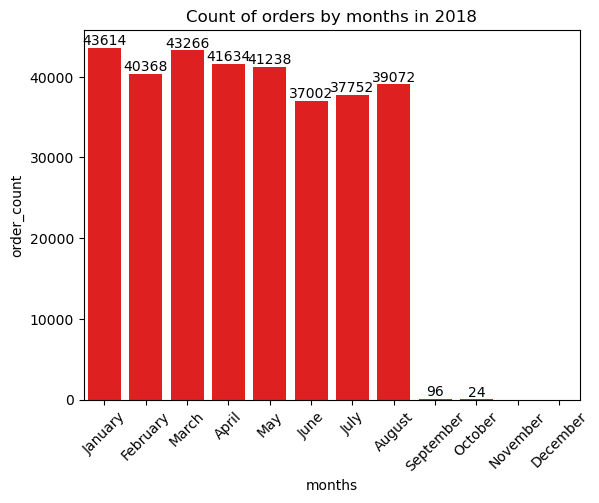

In [8]:
query = """select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
    "October", "November", "December"]
# We can remove color option or can give any color
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "red")

plt.xticks(rotation = 45)

ax.bar_label(ax.containers[0])

plt.title("Count of orders by months in 2018")
plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [9]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)          # with count & avg, we have to write group by query

select customers.customer_city, round(avg(count_per_order.oc), 2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer city", "average products/order"])
df.head(10)                   # For top 10 values

,customer city,average products/order
0,padre carvalho,252.00
1,celso ramos,234.00
2,datas,216.00
3,candido godoi,216.00
4,matias olimpio,180.00
5,cidelandia,144.00
6,curralinho,144.00
7,picarra,144.00
8,morro de sao paulo,144.00
9,teixeira soares,144.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [ ]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category", "percentage distribution"])
#plt.pie(df["percentage distribution"], labels = df["category"])   # Avoid pie chart in this case because we have large number of category
#plt.show()

#df.head(10)
df

# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query = """SELECT products.product_category,
count(order_items.product_id),
round(avg(order_items.price), 2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category  

"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["product_category", "order_count", "avg_order_price"])
df

# For corelation we can use NUMPY or PANDAS
arr1 = df["order_count"]
arr2 = df["avg_order_price"]

a = np.corrcoef([arr1, arr2])            # From output we can say there is neutral relationship between order_count & avg_order_price
# -1 means inversely proportional value and +1 means proportional value

print("The correlation between price & number of times a product has been purchase is",a[0][1])

The correlation between price & number of times a product has been purchase is -0.10631514167157556


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

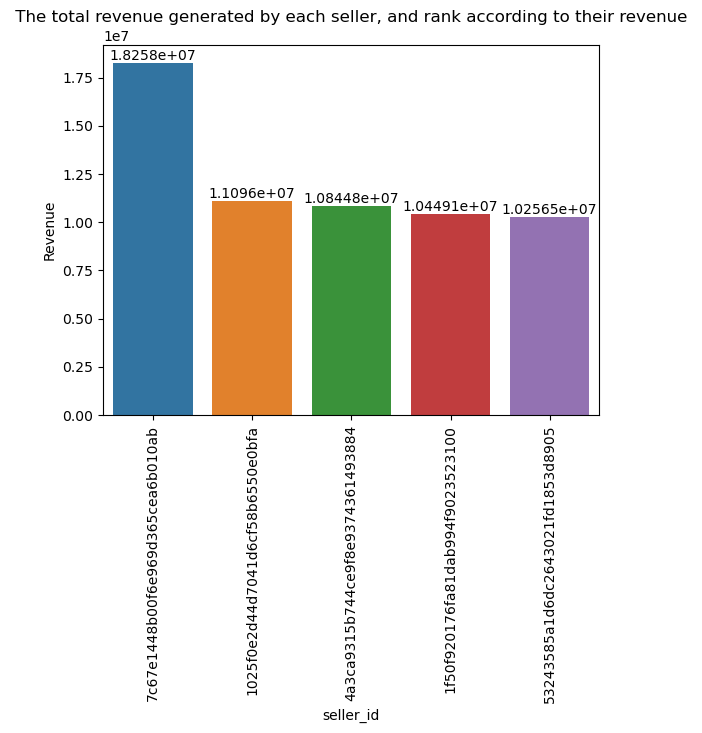

In [4]:
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller_id", "Revenue", "Rank"])
df = df.head(5)
ax = sns.barplot(x = "seller_id", y = "Revenue", data = df)
plt.xticks(rotation = 90)
#df.head(10)
#df
ax.bar_label(ax.containers[0])
plt.title(" The total revenue generated by each seller, and rank according to their revenue ")
plt.show()

# Advanced Queries
# 1. Calculate the moving average of order values for each customer over their order history.

In [ ]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id
) as a
"""

cur.execute(query)

data = cur.fetchall()

data